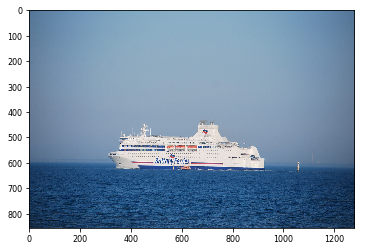

Type:<class 'numpy.ndarray'>
DType: uint8
Shape: (856, 1280, 3)
Size: 3287040
Max: 255
Min: 0
Contrast: 255
Mean (Brightness): 133.44707061672509
STDD: 51.05563038525983



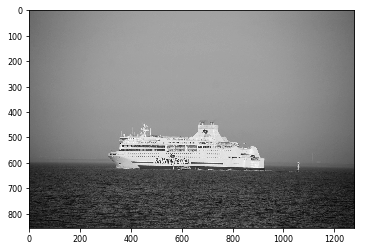

Type:<class 'numpy.ndarray'>
DType: uint8
Shape: (856, 1280, 3)
Size: 3287040
Max: 255
Min: 0
Contrast: 255
Mean (Brightness): 133.44707061672509
STDD: 51.05563038525983



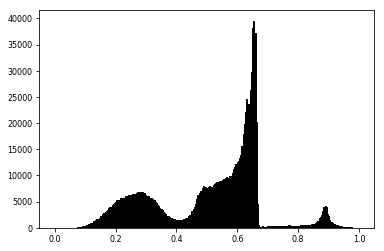

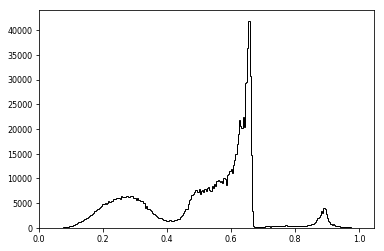

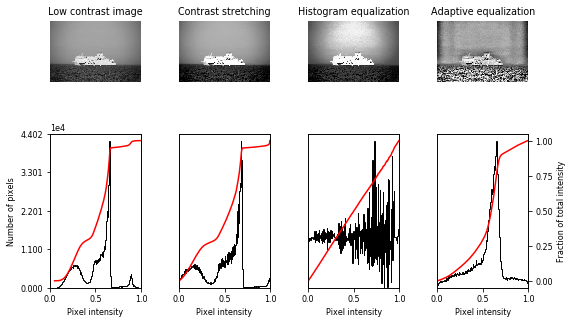

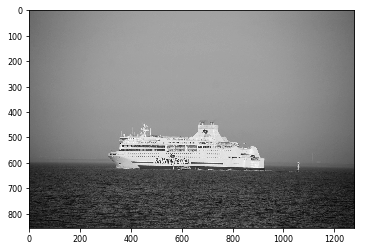

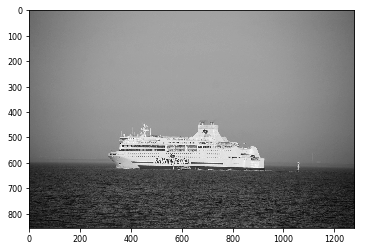

In [26]:
# IN HERE WE IMPORT THE NECESSARY MODULES #############################################
# MANIPULATING ARRAYS AND MATRICES
import numpy as np
# READING AND WRITING IMAGES
import imageio
# CONVERT IMAGE TO GRAYSCALE, HISTOGRAMS
from skimage.color import rgb2gray
from skimage import exposure
from skimage import img_as_float
from skimage import filters
from skimage.filters import rank
from skimage.morphology import disk
import skimage
#http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_gray.html
# http://scikit-image.org/docs/stable/api/skimage.color.html#rgb2gray
# PLOTTING LIBRARY FOR PYTHON
import matplotlib
import matplotlib.pyplot as plt
########################################################################################

# READING AND PRESENTING IMAGES ########################################################
def printImage( img ):
    
    plt.imshow( img )
    plt.show()

def printGrayImage( img ):
    
    plt.imshow( img, cmap=plt.cm.gray )
    plt.show()

def imageInfo( img ):
    
    print( "Type:" +    str( type( img ) ) )
    print( "DType: " +  str( img.dtype  )   )
    print( "Shape: " +  str( img.shape  )   )
    print( "Size: "  +  str( img.size   )   )
    print( "Max: "   +  str( img.max()  )   )
    print( "Min: "   +  str( img.min()  )   )
    print( "Contrast: " + str( img.max() - img.min() ) )
    print( "Mean (Brightness): "  +  str( img.mean() )   )
    print( "STDD: "  +  str( img.std()  )   )
    print()
    
img_to_read_path = "boat-ferry-departure-crossing-sea-2733061.jpg"
img = imageio.imread( img_to_read_path )
# https://pypi.org/project/imageio/
img = np.array( img )
printImage( img )
imageInfo( img )
########################################################################################

# CONVERSION TO GRAYSCALE ##############################################################
img_gray = rgb2gray(img)
printGrayImage( img_gray )
imageInfo( img )
########################################################################################

# HISTOGRAM ############################################################################
imgplot  = plt.hist(img_gray.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k' )
plt.show()

imgplot = plt.hist(img_gray.ravel(), bins=256, histtype='step', color='black')
plt.show()

# https://github.com/scikit-image/scikit-image/blob/master/doc/examples/color_exposure/plot_equalize.py
matplotlib.rcParams['font.size'] = 8

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.
    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = img_gray

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()
########################################################################################


# IMAGE ENHANCEMENT ####################################################################
# brighten an image
def imageAddition( img, img_or_int ):
    
    return img + img_or_int;

# darken an image, determine whether two images are the same, to remove background, find boundaries
def imageSubtraction( img, img_or_int ):
    
    return img - img_or_int;

# brightening process known as dynamic scaling, more natural than adding
def imageMultiplication( img, img_or_int ):
    
    return img * img_or_int;

# extract the background from an image
# darkening process known as anti dynamic scaling, more natural than subracting
def imageDivision( img, img_or_int ):
    
    return img // img_or_int;


# finding differences between two images
def xorOperation( img1, img2 ):
    
    xor_image = (img1 and not img2) or (not img1 and img2)

    return xor_image
# https://stackoverflow.com/questions/432842/how-do-you-get-the-logical-xor-of-two-variables-in-python
    
# blur image or reduce the amount of noise
def blurImage( img ):
    
    bluredImg = skimage.filters.median( img )
    return bluredImg;
# http://scikit-image.org/docs/dev/api/skimage.filters.html


def normalizeImage( img ):
    
    return ( img-img.min() ) / ( img.max()-img.min() );

# sharpen image
def createdSharpenedImageByLaplacian( img ):
    
    return skimage.filters.laplace( img )

# sharpen image
def unsharpMasking( orig_image ):
    
    selem = disk(20)
    
    mean_image = rank.mean( orig_image, selem=selem )
    
    altered_image = orig_image - blurImage( mean_image )
    
    altered_image = orig_image + altered_image
    
    return altered_image


img_gray = imageAddition( img_gray, 20 )
printGrayImage( img_gray )

img_gray = normalizeImage( img_gray )
printGrayImage( img_gray )




########################################################################################

# WRITE IMAGE TO DISK ##################################################################
def writeImageToDisk( img_path, img ):
    
    imageio.imwrite( img_path , img )


writeImageToDisk( 'writed_image.jpg', img_gray )
########################################################################################


    




    
    








#http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html


